# GUI design tests

After adding a few buttons, it became clear that it's easy to write messy code for a GUI. A major difficulty are the numerous links between the graphical elements that contrasts to the desire to write reusable code. The default GUI elemenents in IPyWidgets are reusable, but they need call backs and update methods to function. It is possible o hardwire all this from the outside, but the number of links increases rapidly with the number of widgets on the screen.

## Centralized variables

By default, the variables represented eg by a slider are not linked to the other GUI elements. Below, we attempt an alternative approach where the widgets are linked by an object called a variable. The aim is to connect by default all elements called time for example. If a display needs two time variables, then these can be given different names.

In [1]:
# Imports

# arrays
import xarray as xr
import numpy as np 
import zarr
# plotting
import matplotlib.pyplot as plt 
%matplotlib widget
plt.rcParams['figure.figsize'] = [10, 5]
# gui elements
import ipywidgets as widgets
#from ipyleaflet import *

In [2]:
from wtcore.variables import *
from wtcore.widgets import *
from wtcore.plots import *

## Demo of class Variable

Several variable types have been wrapped in a class derived from Variable. These have a name, a label
and you can attch an object that will be informed of changes to the variable, by a call like myobj.update(this_variable). 
There is a short demo below.

In [3]:

# A variable with an integer in a range
v1=IntVariable("layer","Vertical layer number",1,10,1)
print(f'variable name={v1.name} label={v1.label}\n')
print(f'current {v1.name} has value {v1.value} of range {v1.min}:{v1.max}\n')

# A cange to the variable
class DemoObserver:
    def __init__(self):
        self.current=None
    def update(self,v):
        self.current=v.value
obs=DemoObserver()
v1.observe(obs)
v1.value=3 #change the value
print("change value\n")
print(f'current {v1.name} has value {v1.value} of range {v1.min}:{v1.max}\n')
print(f'the observer received value {obs.current}')

print("---------------------------------\n")

# a variable with a selection from a list
v2=ListVariable("station","Station name",["Vlissingen","Hoek van Holland","Platform K13"])
print(f'variable name={v2.name} label={v2.label}\n')
print(f'current {v2.name} has value {v2.value} which denotes {v2.value_str} \n')

v2.value=1
print(f'current {v2.name} has value {v2.value} which denotes {v2.value_str} \n')

v2.value_str="Platform K13"
print(f'current {v2.name} has value {v2.value} which denotes {v2.value_str} \n')

print("---------------------------------\n")


variable name=layer label=Vertical layer number

current layer has value 1 of range 1:10

set value of layer to 3

change value

current layer has value 3 of range 1:10

the observer received value 3
---------------------------------

variable name=station label=Station name

current station has value 0 which denotes Vlissingen 

set value of station to 1

current station has value 1 which denotes Hoek van Holland 

set value of station to Platform K13

current station has value 2 which denotes Platform K13 

---------------------------------



## Integers

Selection from a range of integers is eg usefull to select a layer to be plotted.

Below is a small demo that connects two sliders and a label.

In [4]:
# Demo for Int slider and label.
# The widgets are connected with the variable
v2=IntVariable("itime","Time-step",1,100,1)
sld2a=WtIntSlider(v2)
sld2b=WtIntSlider(v2)
lbl2=WtIntLabel(v2)
display(sld2a,sld2b,lbl2)

WtIntSlider(value=1, continuous_update=False, description='Time-step', min=1)

WtIntSlider(value=1, continuous_update=False, description='Time-step', min=1)

WtIntLabel(value='1', description='Time-step')

## A list of items

A list of items can for example be usefull as a list of location names.

Below is a small demo with a dropdown selection

In [5]:
v3=ListVariable("station","Station name",["Vlissingen","Hoek van Holland","Platform K13"])
sld3a=WtListDropdown(v3)
sld3b=WtListDropdown(v3)
lbl3=WtListLabel(v3)
display(sld3a,sld3b,lbl3)

WtListDropdown(description='Station name', options=('Vlissingen', 'Hoek van Holland', 'Platform K13'), value='…

WtListDropdown(description='Station name', options=('Vlissingen', 'Hoek van Holland', 'Platform K13'), value='…

WtListLabel(value='Vlissingen', description='Station name')

In [ ]:
#TODO there is quite some activity after only one change
v3.value=2

## Plots

wtPlot uses the ipywidgets.Output to create a link to the matplotlib plots. To use this class, you must extend it and implement the method redraw().

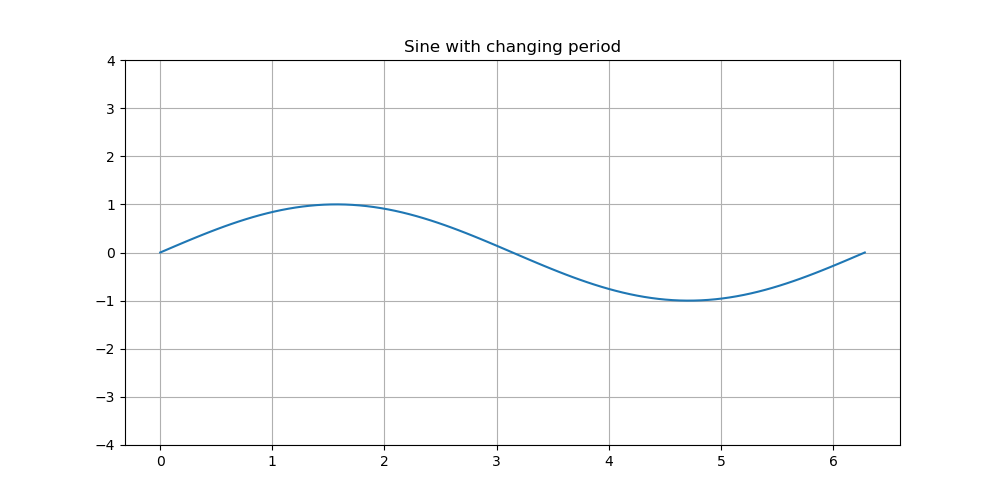

In [7]:
class MyPlot1(wtPlot):
    def __init__(self,variables,*args,**kwargs):
        super().__init__(variables,*args,**kwargs)
        #expand here with your own data
    def redraw(self):
        ax=self.ax
        period=self.variables[0].value
        x = np.linspace(0, period * 2 * np.pi, 100)
        ax.plot(x, np.sin(x), color='C0')
        plt.title("Sine with changing period")
        ax.set_ylim([-4, 4])
        ax.grid(True)

int1=IntVariable("iperiod","# cycles",1,10,1) #define variable
int1sld=WtIntSlider(int1) #create slider linked to variable int1
p1=MyPlot1([int1]) #create plot linked to variable int1, too
gui=widgets.VBox([int1sld,p1]) #vertical stack of slider and plot
display(gui)
p1.redraw()